In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy import stats

In [2]:
%matplotlib inline
sns.set_theme()

### Load Dataset

In [3]:
file_path = os.path.join("..", "data", "usedcars_dataset.csv")
df = pd.read_csv(file_path, sep=";", index_col="url")

df = (df.astype({'Anno':'datetime64[ns]', 'date':'datetime64[ns]'})
    .assign(age_years= lambda x: (x['date'] - x['Anno']) / np.timedelta64(1, 'Y'))
)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61771 entries, renault-clio-0-9-tci-90-hp-intense-benzina-grigio-6588b7a7-3f64-4471-94fd-8af6ee13ba20 to peugeot-2008-2008-1-6-bluehdi-active-75cv-my16-diesel-argento-4704d2e2-1154-4fec-ad5f-18c64f1d1d5f
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Acconto                  60035 non-null  float64       
 1   Anno                     59236 non-null  datetime64[ns]
 2   Carburante               61771 non-null  object        
 3   Carrozzeria              61771 non-null  object        
 4   Chilometraggio           59948 non-null  float64       
 5   Cilindrata_cm3           58151 non-null  float64       
 6   Cilindri                 48457 non-null  float64       
 7   Colore                   59087 non-null  object        
 8   Comfort                  57487 non-null  object        
 9   Consumo_comb_L100km      48104 non-null  f

In [36]:
df.describe()

,Acconto,Chilometraggio,Cilindrata_cm3,Cilindri,Consumo_comb_L100km,Consumo_extraurb_L100km,Consumo_urb_L100km,Emissioni_CO2_gKm,Marce,Peso_a_vuoto_kg,...,Posti,Prezzo_auto,garanzia_mesi,makeId,modelOrModelLineId,potenza_cv,potenza_kw,price,zip,age_years
count,45507.000000,4.535600e+04,44117.000000,35769.000000,36243.000000,31444.000000,31486.000000,3.614600e+04,35862.000000,27877.000000,...,45091.000000,30219.000000,22837.000000,46684.000000,46264.000000,46495.000000,46495.000000,4.668400e+04,46682.000000,44863.000000
mean,1328.227372,8.089496e+04,1598.422241,3.899550,5.188229,4.594629,6.405488,6.779570e+02,6.001115,1420.425440,...,4.765009,15232.163175,13.876429,1657.238176,19781.462217,129.914077,95.498806,2.209132e+04,35637.742063,6.437128
std,3725.298085,7.841633e+04,598.312330,0.854522,1.808206,1.343099,2.363618,7.438299e+04,1.299451,377.422209,...,0.814403,7084.578210,7.797381,5479.264675,19874.766239,67.640309,49.738091,7.178246e+04,25594.098063,6.390690
min,0.000000,0.000000e+00,0.000000,0.000000,0.100000,0.100000,0.100000,0.000000e+00,0.000000,1.000000,...,0.000000,600.000000,0.000000,6.000000,1600.000000,1.000000,1.000000,1.000000e+00,10.000000,0.004202
25%,0.000000,3.016950e+04,1242.000000,4.000000,4.200000,3.900000,5.000000,1.050000e+02,5.000000,1165.000000,...,5.000000,9900.000000,12.000000,28.000000,2090.000000,90.000000,66.000000,1.170000e+04,18018.000000,2.767326
50%,0.000000,6.629750e+04,1499.000000,4.000000,4.900000,4.300000,5.900000,1.190000e+02,6.000000,1395.000000,...,5.000000,14990.000000,12.000000,42.000000,18481.000000,116.000000,85.000000,1.720000e+04,31100.000000,4.664485
75%,0.000000,1.171962e+05,1968.000000,4.000000,5.800000,5.000000,7.200000,1.390000e+02,7.000000,1605.000000,...,5.000000,20385.000000,12.000000,64.000000,20008.000000,150.000000,110.000000,2.580000e+04,48018.000000,8.474070
max,60000.000000,8.888888e+06,15607.000000,12.000000,69.000000,57.000000,88.000000,9.999999e+06,11.000000,31000.000000,...,22.000000,30000.000000,99.000000,51924.000000,76377.000000,1967.000000,1447.000000,9.999999e+06,98158.000000,89.090744


In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head())

,Acconto,Anno,Carburante,Carrozzeria,Chilometraggio,Cilindrata_cm3,Cilindri,Colore,Comfort,Consumo_comb_L100km,Consumo_extraurb_L100km,Consumo_urb_L100km,Emissioni_CO2_gKm,Extra,Intrattenimento__Media,Marce,Peso_a_vuoto_kg,Porte,Posti,Prezzo_auto,Sicurezza,Tagliandi_certificati,Tipo_di_cambio,Tipo_di_veicolo,Trazione,city,country,countryCode,date,garanzia_mesi,makeId,maker,model,modelOrModelLineId,modelVersionInput,potenza_cv,potenza_kw,price,street,unico_proprietario,zip,age_years
url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
renault-clio-0-9-tci-90-hp-intense-benzina-grigio-6588b7a7-3f64-4471-94fd-8af6ee13ba20,0.0,2017-04-01,Benzina,Berlina,120398.0,NaN,3.0,Grigio,Chiusura centralizzata senza chiave;Climatizza...,NaN,NaN,NaN,NaN,Cerchi in lega,Autoradio;Bluetooth;MP3;Vivavoce,5.0,NaN,4.0,5.0,11800.0,ABS;Airbag conducente;Airbag laterali;Airbag p...,False,Manuale,Usato,Anteriore,Udine - Ud,Italy,IT,2022-11-07 17:50:40.113020,12.0,60,Renault,Clio,1961.0,0.9 TCI 90 HP INTENSE,90.0,66.0,11800.0,Via Caratti Umberto,True,33100.0,5.603793
peugeot-3008-3008-1-6-bluehdi-gt-line-eat-cambio-automatico-diesel-grigio-8d933cb7-d10a-4a13-adf4-7f3911f97a51,5196.0,2018-05-01,Diesel,SUV/Fuoristrada,99800.0,1560.0,4.0,Grigio,Alzacristalli elettrici;Bracciolo;Chiusura cen...,4.4,4.1,4.9,114.0,Cerchi in lega;Controllo vocale;Freno di stazi...,Android Auto;Apple CarPlay;Autoradio;Autoradio...,6.0,1390.0,5.0,5.0,24900.0,ABS;Adaptive Cruise Control;Airbag conducente;...,True,Automatico,Usato,Anteriore,Afragola - Na,Italy,IT,2022-11-07 17:50:40.890436,NaN,55,Peugeot,3008,19217.0,3008 1.6 bluehdi GT Line eat CAMBIO AUTOMATICO,120.0,88.0,24900.0,Via A. Mancini,True,80021.0,4.522320
di-a4-avant-40-tfsi-190-cv-s-tronic-advanced-benzina-argento-e7a9994a-a0ec-4d78-8e19-7d2248a96813,0.0,2020-03-01,Benzina,Station Wagon,10561.0,1984.0,4.0,Argento,Alzacristalli elettrici;Bracciolo;Climatizzato...,6.1,5.3,7.4,133.0,"Cerchi in lega (17"");Controllo vocale;Gancio t...",Android Auto;Apple CarPlay;Bluetooth;Carica pe...,7.0,1585.0,5.0,5.0,NaN,ABS;Airbag conducente;Airbag laterali;Airbag p...,True,Automatico,Usato,Anteriore,Solbiate Olona - Varese - VA,Italy,IT,2022-11-07 17:50:41.749963,24.0,9,Audi,A4,1626.0,Avant 40 TFSI 190 CV S tronic Advanced,190.0,140.0,36900.0,Via Dei Combattenti,False,21058.0,2.687923
bmw-x1-18d-150cv-6m-e6d-temp-ss-x-drive-sportline-navi-diesel-bianco-3239c4ba-9650-48a6-b934-6321a64a35c5,0.0,2021-05-01,Diesel,SUV/Fuoristrada,17000.0,NaN,NaN,Bianco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Manuale,Usato,Integrale,Salerno - Sa,Italy,IT,2022-11-07 17:50:43.447828,12.0,13,BMW,X1,19242.0,18D 150CV 6M. E6D-TEMP SS X-DRIVE SPORTLINE (N...,150.0,110.0,34700.0,Via Roberto Wenner,True,84100.0,1.521574
hyundai-tucson-1-7-crdi-dct-auto-xpossible-diesel-grigio-e7196608-247f-4b79-b53c-ab61460d282b,5575.0,2016-11-01,Diesel,SUV/Fuoristrada,87000.0,1685.0,4.0,Grigio,Alzacristalli elettrici;Bracciolo;Climatizzato...,4.9,4.7,5.4,129.0,"Cerchi in lega (17"");Freno di stazionamento el...",Autoradio;Bluetooth;CD;Computer di bordo;MP3;U...,7.0,1545.0,5.0,5.0,18900.0,ABS;Airbag conducente;Airbag laterali;Airbag p...,False,Automatico,Usato,Anteriore,Pistoia - Pt,Italy,IT,2022-11-07 17:50:44.064556,NaN,33,Hyundai,TUCSON,18493.0,1.7 CRDi DCT Auto XPossible,141.0,104.0,18900.0,"Vial Manzoni 27""}",True,51100.0,6.017218


### Find input errors

In [52]:
MAX_KM = 1e6
MAX_CV = 1000
MAX_AGE = 100
MAX_PRICE = 1e6
MIN_PRICE = 100
MAX_ENGSIZE = 1e4

In [55]:
#Almost certainly input errors
df_input_errors = (df.query("(age_years>@MAX_AGE or age_years < 0) \
                            or (potenza_cv > @MAX_CV or potenza_cv < 0) \
                            or (Chilometraggio>@MAX_KM or Chilometraggio < 0) \
                            or (price > @MAX_PRICE or price < @MIN_PRICE ) \
                            or (Cilindrata_cm3 > @MAX_ENGSIZE or Cilindrata_cm3 < 0 )"
                            )
                            .loc[:, ['maker', 'model', 'Anno', 'Chilometraggio', 'potenza_cv', 'Cilindrata_cm3', 'price']]
                            .sort_values(by=['price'], ascending=False)
                    )   

Most of these cars have clear input errors, with just few exception (e.g the Ford GT price or the trucks engine sizes)

In [56]:
print(f'Found {len(df_input_errors)} possible errors')
df_input_errors

Found 31 possible errors


,maker,model,Anno,Chilometraggio,potenza_cv,Cilindrata_cm3,price
url,,,,,,,
ford-b-max-1-4-90cv-gpl-titanium-gpl-rosso-e02275a3-7461-4974-a909-1bdaabe0bfe,Ford,B-Max,2016-03-01,63711.0,87.0,1388.0,9999999.0
renault-captur-dci-8v-90-cv-s-s-energy-intens-diesel-bianco-5306209b-78ce-4117-90b5-c4792c8db164,Renault,Captur,2018-08-01,85875.0,90.0,1461.0,9999999.0
land-rover-range-rover-evoque-evoque-5p-2-0-td4-hse-150cv-auto-diesel-bianco-28985dec-fd55-428c-adaf-6657ac306b24,Land Rover,Range Rover Evoque,2017-06-01,29526.0,150.0,1999.0,3420000.0
ssan-qashqai-qashqai-1-5-dci-n-tec-start-115cv-diesel-nero-f619c8e2-7e1c-4d49-997a-194f2abae9ad,Nissan,Qashqai,2021-02-01,26970.0,116.0,1461.0,2490000.0
smart-fortwo-fortwo-1-0-superpassion-71cv-twinamic-benzina-bianco-a75a4c7d-7476-4cbc-a0cb-13b0b17e3905,smart,forTwo,2019-06-01,25602.0,71.0,999.0,1549017.0
fiat-panda-panda-1-0-firefly-hybrid-city-life-s-elettrica-benzina-grigio-3eb2d5cc-ab18-443c-a849-6858d85f6b5e,Fiat,Panda,2021-02-01,47372.0,69.0,999.0,1449016.0
fiat-panda-panda-1-0-firefly-hybrid-city-life-s-elettrica-benzina-blu-azzurro-efed3217-b857-41a7-862d-01fe2b0220af,Fiat,Panda,2021-02-01,40841.0,69.0,999.0,1449015.0
ford-gt-carbon-series-benzina-nero-0d45be36-7398-4072-9f16-a4c82a9a49c6,Ford,GT,NaT,30.0,670.0,3994.0,1040000.0
lfa-romeo-spider-alfa-romeo-giulietta-spider-passo-corto-750-d-benzina-7ce2cf84-9ad9-49b5-a8b0-f9bd7ca3dc39,Alfa Romeo,Spider,1957-01-01,9999999.0,65.0,NaN,99500.0


### Find Missing data

In [8]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh", figsize=(12,10))
        plt.show()
    else:
        print('No NAs found')



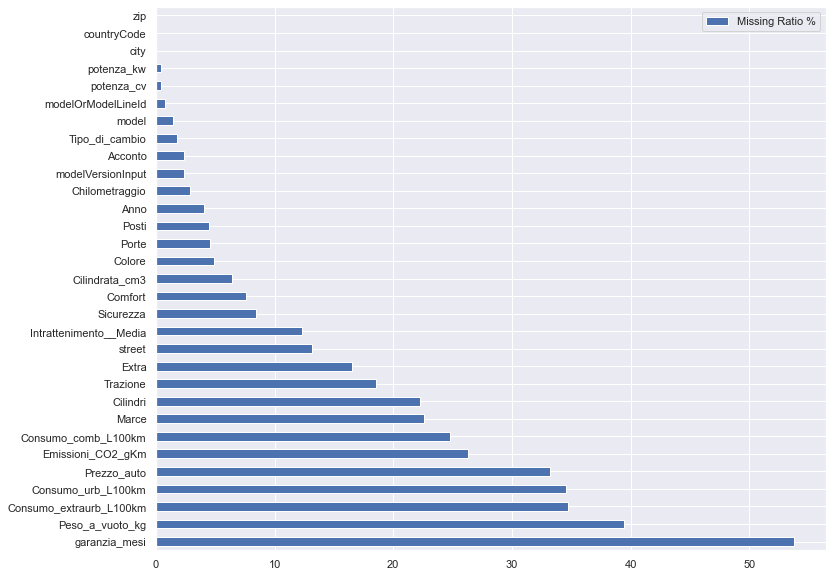

In [9]:
plot_nas(df)

### Value counts for some categorical data

In [10]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in ['maker', 'model', 'Carburante', 'Trazione', 'Tipo_di_cambio', 'Colore']],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

In [11]:
unique_counts

,Column_Name,Num_Unique
3,Trazione,3
4,Tipo_di_cambio,3
2,Carburante,7
5,Colore,14
0,maker,101
1,model,1197


<AxesSubplot:>

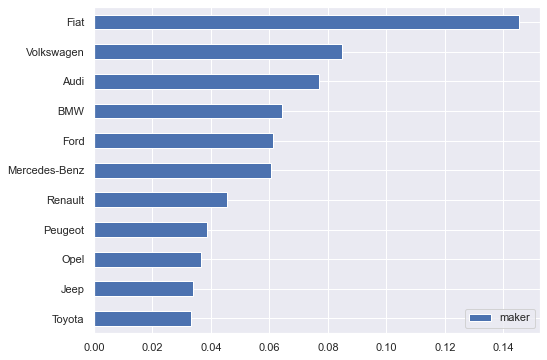

In [12]:
col = 'maker'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[10::-1]}).plot(kind='barh', figsize=(8, 6))

<AxesSubplot:>

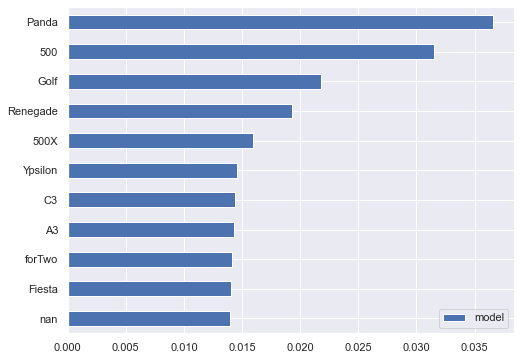

In [13]:
col = 'model'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[10::-1]}).plot(kind='barh', figsize=(8, 6))

<AxesSubplot:>

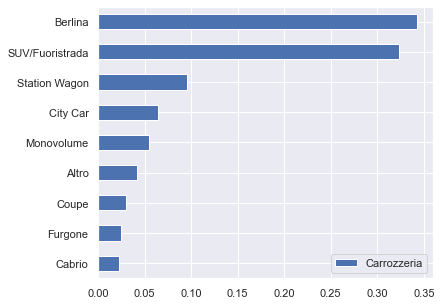

In [14]:
col = 'Carrozzeria'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

<AxesSubplot:>

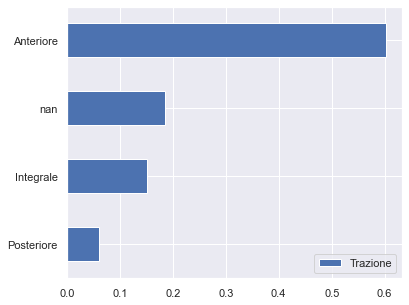

In [15]:
col = 'Trazione'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

<AxesSubplot:>

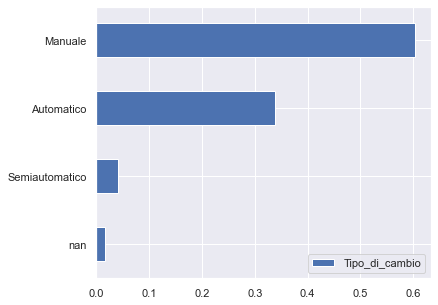

In [16]:
col = 'Tipo_di_cambio'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

<AxesSubplot:>

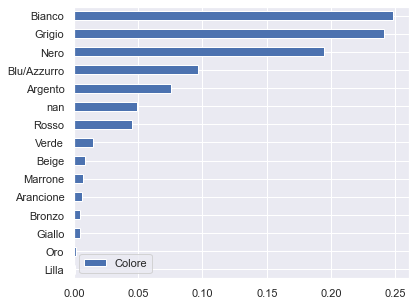

In [17]:
col = 'Colore'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

### Numerical variables exploration

The price distribuition is highly asymmetrical, with a large right tail (indeed, prices must be positive).

<AxesSubplot: ylabel='Frequency'>

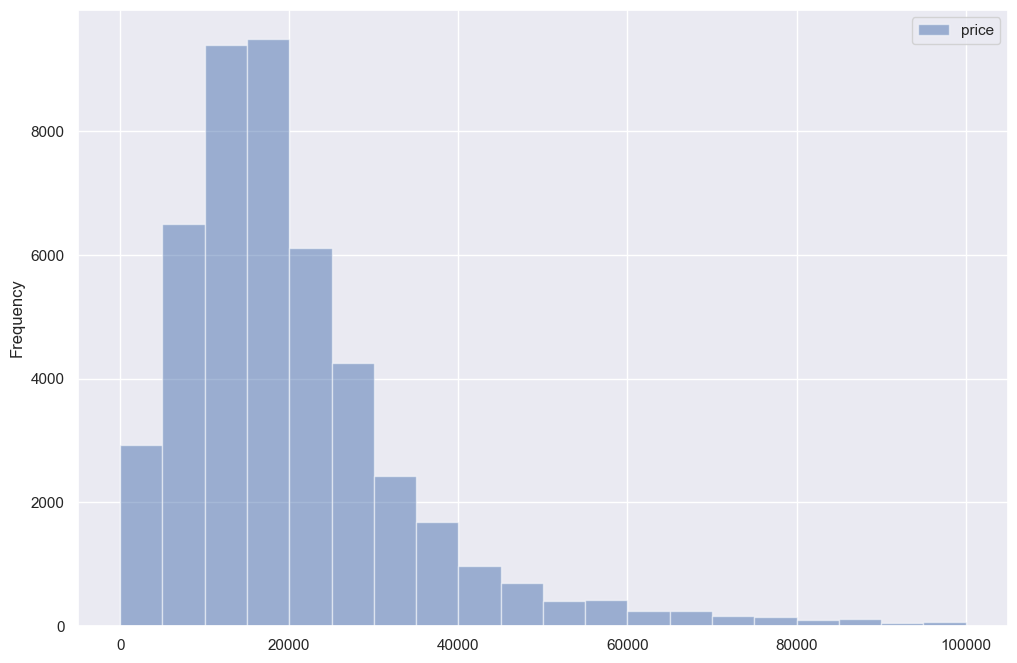

In [37]:
#df['price'].apply(np.log).plot.hist(bins=20 ,legend=True, alpha=0.5, figsize=(12,8))
df['price'].plot.hist(bins=20, range=(0, 1e5), legend=True, alpha=0.5, figsize=(12,8))

Comparing pricese with Lognorm distribuition

In [22]:
shape, loc, scale = stats.lognorm.fit(df.price[df.price<1e5], floc=0.)
dist = stats.lognorm(shape, loc, scale)
rvs = dist.rvs(len(df))

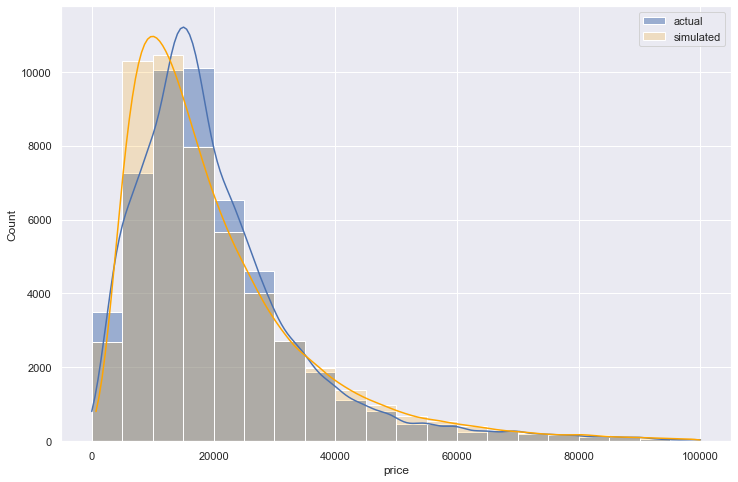

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(df.price[df.price<1e5], bins=np.arange(0, 1e5, 5e3), binrange=(0, 1e5), kde=True, label = 'actual');
sns.histplot(rvs[rvs<1e5], bins=np.arange(0, 1e5, 5e3), binrange=(0, 1e5), kde=True, label='simulated', color='orange', alpha=0.2);
plt.legend();

<AxesSubplot: ylabel='Frequency'>

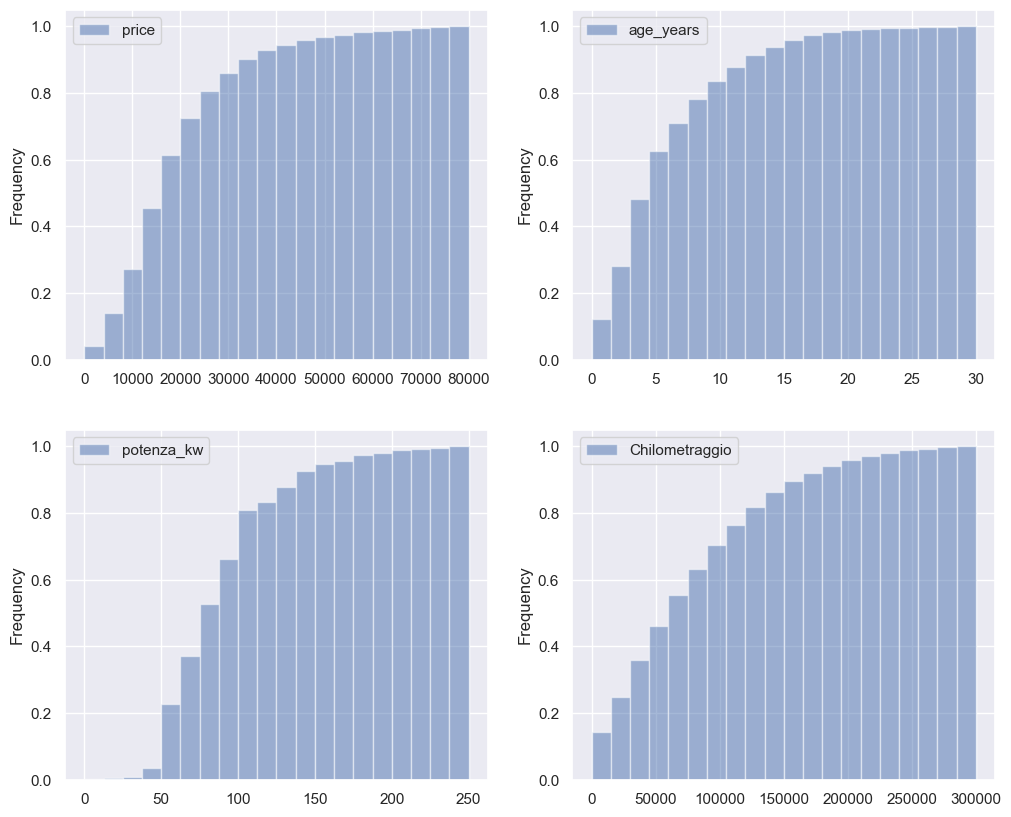

In [58]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12, 10))
df['price'].plot.hist(bins=20, range=(0, 0.8e5), density=True, cumulative=True, legend=True, alpha=0.5, ax=ax1)
df['age_years'].plot.hist(bins=20, range=(0, 30), density=True, cumulative=True, legend=True, alpha=0.5, ax=ax2)
df['potenza_kw'].plot.hist(bins=20, range=(0, 250), density=True, cumulative=True, legend=True, alpha=0.5, ax=ax3)
df['Chilometraggio'].plot.hist(bins=20, range=(0, 3e5), density=True, cumulative=True, legend=True, alpha=0.5, ax=ax4)

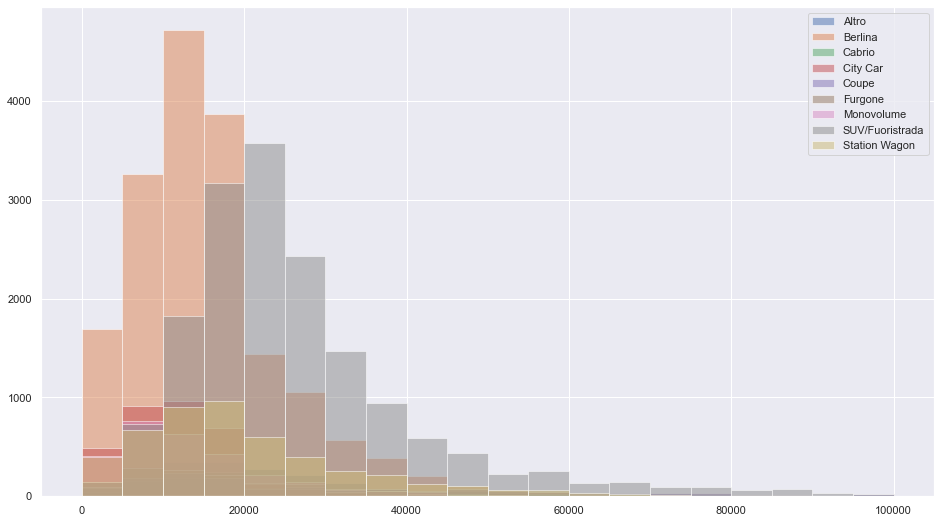

In [24]:
df.groupby('Carrozzeria',sort=True)['price'].hist(bins=20, density=False, range=(0,1e5), alpha=0.5, legend=True, figsize=(16,9));

Avergage price per automaker

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', '{:.0f}'.format):
    display(df.groupby('maker')['price'].apply(np.mean).sort_values(ascending=False).to_frame().T)

maker,Lamborghini,McLaren,Ferrari,Rolls-Royce,Aston Martin,Porsche,Lotus,Caterham,RAM,Bentley,Maserati,Tesla,Cadillac,HUMMER,Land Rover,Puch,Buick,Dodge,Maxus,Cupra,Lynk \u0026 Co,Triumph,Audi,Jaguar,Mercedes-Benz,Lexus,Corvette,BMW,DS Automobiles,MG,Isuzu,Jeep,Volvo,Alfa Romeo,Pontiac,DFSK,EMC,Ford,Abarth,Austin,Subaru,DR Motor,Oldtimer,Skoda,Volkswagen,EVO,MINI,Mazda,Renault,Nissan,Iveco,Infiniti,Altro,Kia,SEAT,Lincoln,Peugeot,Tazzari EV,Toyota,Lada,Honda,Hyundai,Suzuki,GMC,XEV,Mitsubishi,Dacia,Citroen,Great Wall,Fiat,Opel,SsangYong,Giotti Victoria,smart,Mahindra,Casalini,Ligier,Lancia,Aixam,VEM,Chevrolet,Piaggio,UAZ,Rover,Autobianchi,Saab,Tata,Innocenti,Microcar,Chrysler,Daihatsu,DAF,Daewoo
price,306823,256428,218257,176225,97986,76719,76472,64500,64000,56943,56922,49323,48684,42790,41952,38000,37000,36831,36222,35253,34084,33375,32452,32418,31471,30450,29900,29605,27571,26829,26186,26160,25100,24187,22500,21999,21997,21664,21495,21467,21090,21080,20960,20376,20344,19982,19939,19812,19674,19275,18654,18232,18135,17636,17411,17400,17286,17135,16521,16400,16204,15947,15943,15450,15190,14406,14031,13894,13778,13708,13682,13606,13450,12900,12622,11978,11780,11524,11259,9990,9938,9936,9500,8900,8388,6965,6722,6587,6500,6495,6369,4250,1666


Exploring the correlation between variables. As expected, the correlation between the engine size and power is large and positive, and in general heavier vehicles have larger engines.
Moreover, the age and the mileage have a negative correlation with the price.

In [7]:
var_corr = df[['price', 'potenza_kw', 'Cilindrata_cm3', 'Chilometraggio','Consumo_comb_L100km', 'unico_proprietario', 'Peso_a_vuoto_kg', 'Posti', 'garanzia_mesi', 'age_years']].corr()

In [8]:
var_corr

,price,potenza_kw,Cilindrata_cm3,Chilometraggio,Consumo_comb_L100km,unico_proprietario,Peso_a_vuoto_kg,Posti,garanzia_mesi,age_years
price,1.000000,0.191195,0.122128,-0.079023,0.055156,0.014113,0.095310,0.001915,0.179380,-0.064590
potenza_kw,0.191195,1.000000,0.770579,0.023384,0.451819,0.022094,0.599967,0.073906,0.060169,-0.067714
Cilindrata_cm3,0.122128,0.770579,1.000000,0.260507,0.462383,0.050063,0.663445,0.098702,0.002087,0.178958
Chilometraggio,-0.079023,0.023384,0.260507,1.000000,0.149960,0.017484,0.111517,0.057159,-0.189742,0.456413
Consumo_comb_L100km,0.055156,0.451819,0.462383,0.149960,1.000000,-0.037000,0.337177,-0.038238,0.019247,0.321686
unico_proprietario,0.014113,0.022094,0.050063,0.017484,-0.037000,1.000000,0.008427,-0.006842,-0.073048,-0.056567
Peso_a_vuoto_kg,0.095310,0.599967,0.663445,0.111517,0.337177,0.008427,1.000000,0.255172,0.024897,-0.108734
Posti,0.001915,0.073906,0.098702,0.057159,-0.038238,-0.006842,0.255172,1.000000,-0.002873,-0.104242
garanzia_mesi,0.179380,0.060169,0.002087,-0.189742,0.019247,-0.073048,0.024897,-0.002873,1.000000,-0.193760
age_years,-0.064590,-0.067714,0.178958,0.456413,0.321686,-0.056567,-0.108734,-0.104242,-0.193760,1.000000


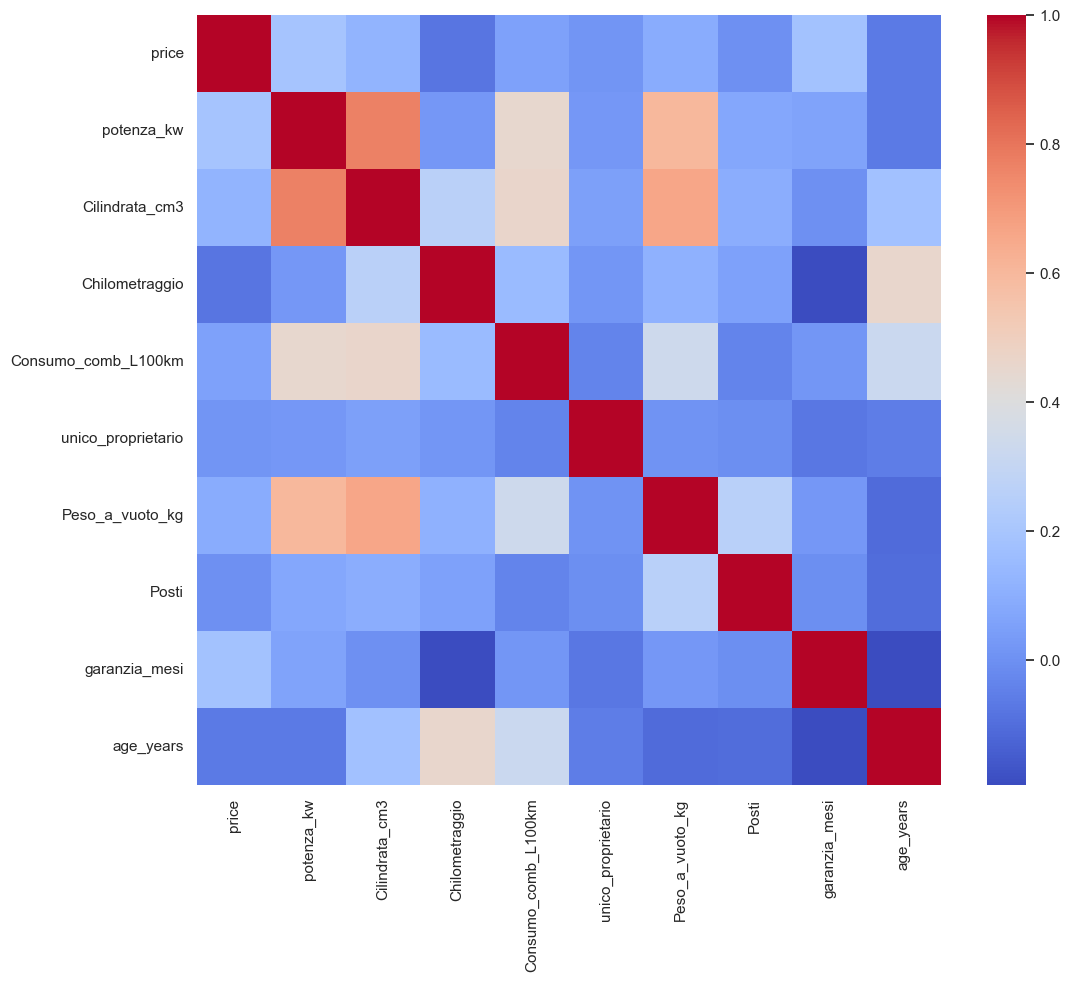

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(var_corr, cmap="coolwarm");

Exploring the correlation between variables

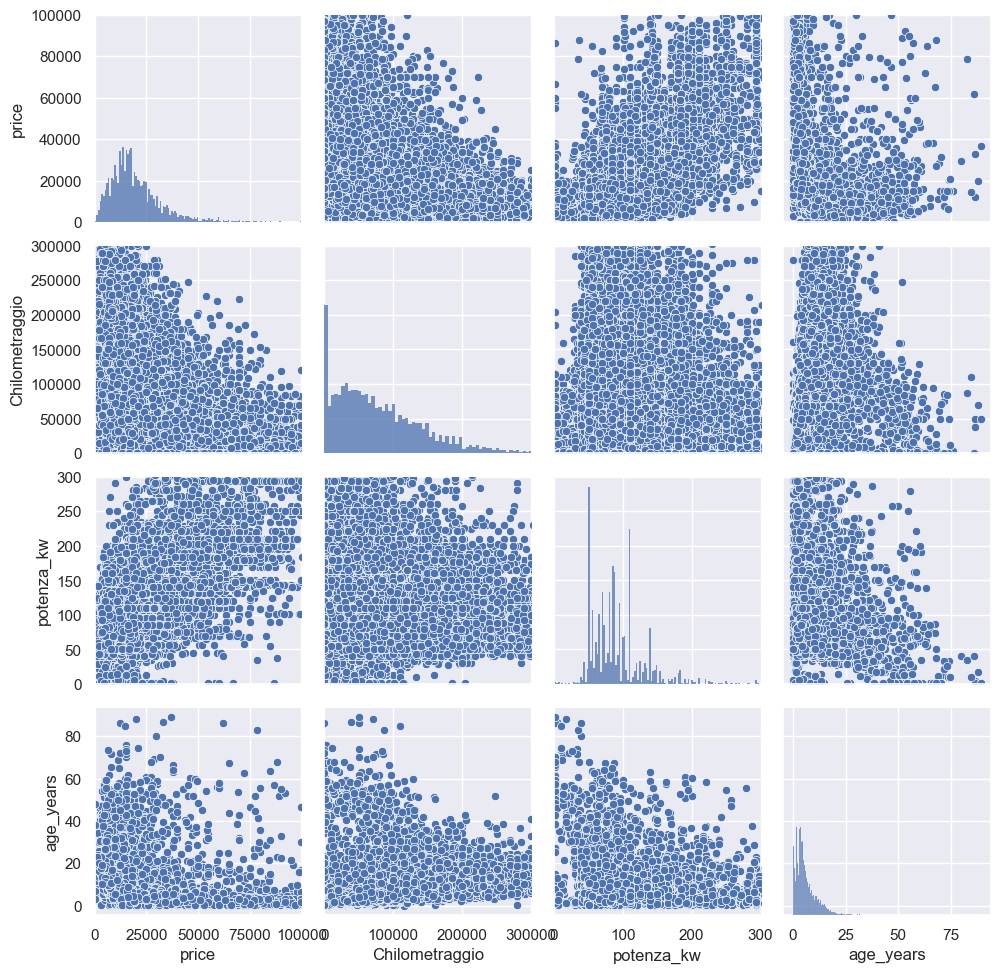

In [10]:
cont_var_pp = sns.pairplot(df[['price', 'Chilometraggio', 'potenza_kw', 'age_years']]);
cont_var_pp.axes[0,0].set_xlim((0,1e5));
cont_var_pp.axes[0,1].set_xlim((0,3e5));
cont_var_pp.axes[0,2].set_xlim((0,300));
cont_var_pp.axes[0,0].set_ylim((0,1e5));
cont_var_pp.axes[1,0].set_ylim((0,3e5));
cont_var_pp.axes[2,0].set_ylim((0,300));

[(0.0, 200000.0), (0.0, 100000.0)]

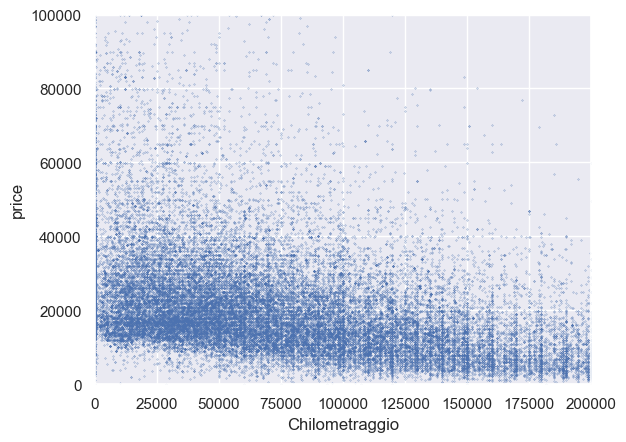

In [22]:
ax = df.plot.scatter('Chilometraggio', 'price', s=0.05)
ax.set(xlim=[0, 2e5], ylim=[0, 1e5])

[(0.0, 200.0), (0.0, 80000.0)]

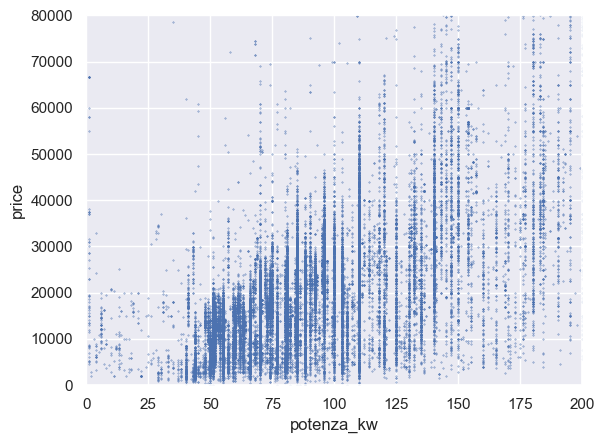

In [27]:
ax = df.plot.scatter('potenza_kw', 'price', s=0.1)
ax.set(xlim=[0, 200], ylim=[0, 0.8e5])

[(0.0, 50.0), (0.0, 80000.0)]

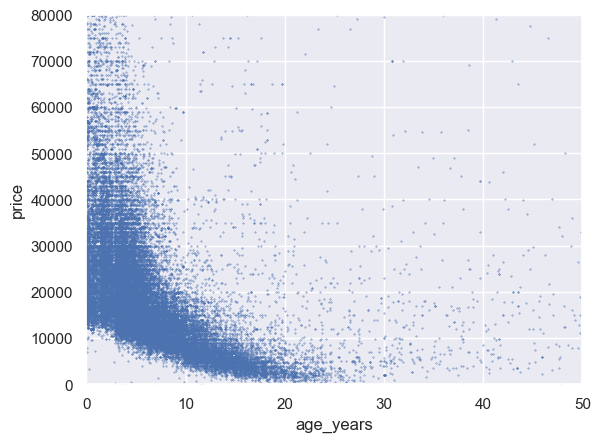

In [31]:
ax = df.plot.scatter('age_years', 'price', s=0.1)
ax.set(xlim=[0, 50], ylim=[0, 0.8e5])

## Pandas profiling

In [11]:
from pandas_profiling import ProfileReport

In [12]:
profile = ProfileReport(df, title="Car Web Profiling Report")

In [ ]:
##profile